## Legal and regulatory maps

In [1]:
# IMPORTS
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import contextily as cx
import requests
import calendar
from importlib import reload

from datetime import datetime, timedelta
from shapely.geometry import Point
from io import StringIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

from geopandas import GeoDataFrame

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

<module 'Src.func_ko' from 'C:\\Users\\kondris\\Documents\\GitHub\\HighMagFlows_EPA_Project\\Src\\func_ko.py'>

In [2]:
# Aquifers to plot and dataset to use
lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
aq_usgs = gpd.read_file('ShapeFiles/Aquifers_USGS/us_aquifers.shp')
stream_network = gpd.read_file('ShapeFiles/Streams_US/stream_network.shp')
aq_usgs_selected_10 = gpd.read_file('ShapeFiles/Aquifers_USGS_10/Aquifers_USGS_10.shp')
aq_usgs_selected_25 = gpd.read_file('ShapeFiles/Aquifers_USGS_25/Aquifers_USGS_25.shp')
huc2 = gpd.read_file('ShapeFiles/_Master_HUC2/master_huc2.shx')
huc4 = gpd.read_file('ShapeFiles/_Master_HUC4/master_huc4.shx')
glacial = gpd.read_file('ShapeFiles/Aquifers_USGS/alluvial.shp')
aq_usgs_glac = gpd.read_file('ShapeFiles/Aquifers_USGS_glacial/Aquifers_USGS_glacial.shp')
aq_usgs_selected_10_glac = gpd.read_file('ShapeFiles/Aquifers_USGS_10_glacial/Aquifers_USGS_10_glacial.shp')
aq_usgs_selected_25_glac = gpd.read_file('ShapeFiles/Aquifers_USGS_25_glacial/Aquifers_USGS_25_glacial.shp')

selected_aq_list_7 = ['High Plains aquifer',
            'Mississippi River Valley alluvial aquifer',
            'Central Valley aquifer system',
            'Floridan aquifer system',
            'Snake River Plain basaltic-rock aquifers',
            'Coastal lowlands aquifer system',
            'Northern Atlantic Coastal Plain aquifer system']

aq_usgs_selected_7 = aq_usgs_selected_10[aq_usgs_selected_10['AQ_NAME'].isin(selected_aq_list_7)]

In [3]:
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
aq_shape

,aquif_id,map_id,aq_name,AREA,PERIMETER,ED_TRINITY,ED_TRINI_1,ROCK_NAME,ROCK_TYPE,AQ_NAME_1,...,GWS_mm_yr,GWS_km3_yr,GWS_net_Ch,GWS_net__1,PENN_,PENN_ID,EXT_ID,EXT_TYP_ID,NAME_1,geometry
0,wab_az,15.0,Arizona_Alluvial,NaN,NaN,NaN,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-109.08014 34.00791, -109.06306 34.0..."
1,cenval,14.0,Central_Valley,NaN,NaN,NaN,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-122.18391 40.29545, -122.21128 40.2..."
2,gcp_colow,8.0,Coastal_Lowlands,NaN,NaN,NaN,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-93.61739 31.23429, -93.40925 31.343..."
3,wvas_colplat,34.0,Columbia_Plateau,NaN,NaN,NaN,NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-119.41396 48.24186, -119.41634 48.2..."
4,None,NaN,Edwards_Trinity,1.904458e+11,5.329277e+06,2.0,3270.0,Sandstone and carbonate-rock aquifers,500.0,Edwards-Trinity aquifer system,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-93.4925 34.0826, -93.49228 34.08251..."
5,None,NaN,Edwards_Trinity,5.705184e+08,1.557880e+05,3.0,3518.0,Sandstone and carbonate-rock aquifers,500.0,Edwards-Trinity aquifer system,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-99.70017 32.14184, -99.70446 32.151..."
6,None,NaN,Edwards_Trinity,2.435452e+09,3.960681e+05,4.0,3519.0,Sandstone and carbonate-rock aquifers,500.0,Edwards-Trinity aquifer system,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-100.48011 32.471, -100.47394 32.429..."
7,None,NaN,Edwards_Trinity,5.999775e+08,1.276441e+05,5.0,3545.0,Sandstone and carbonate-rock aquifers,500.0,Edwards-Trinity aquifer system,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-99.77308 31.91449, -99.77782 31.930..."
8,None,NaN,Edwards_Trinity,2.367636e+08,1.122371e+05,6.0,3579.0,Sandstone and carbonate-rock aquifers,500.0,Edwards-Trinity aquifer system,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-98.17019 30.87808, -98.17556 30.882..."
9,None,NaN,Edwards_Trinity,1.142408e+08,6.163811e+04,7.0,3582.0,Sandstone and carbonate-rock aquifers,500.0,Edwards-Trinity aquifer system,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,"POLYGON ((-97.89015 30.63315, -97.89355 30.630..."


In [4]:
# Aquifers with depletion data
selected_aq_list_depl = ['High Plains aquifer',
            'Mississippi River Valley alluvial aquifer',
            'Mississippi embayment aquifer system',
            'Central Valley aquifer system',
            'Edwards-Trinity aquifer system',
            'Snake River Plain basaltic-rock aquifers',
            'Columbia Plateau basaltic-rock aquifers',
            'Floridan aquifer system',
            'Surficial aquifer system',
            'Northern Atlantic Coastal Plain aquifer system']

epsg = 5070 # 3857

aq_usgs_selected_depl = aq_usgs_selected_25[aq_usgs_selected_25['AQ_NAME'].isin(selected_aq_list_depl)]
aq_usgs_selected_depl = aq_usgs_selected_depl.to_crs(epsg=epsg)

aq_shape = aq_shape.to_crs(epsg=epsg)

row_to_add = aq_shape[aq_shape['aq_name'] == 'Arizona_Alluvial']
if not row_to_add.empty:
    geometry_to_add = row_to_add.geometry[0]
    new_row = {
        'AQ_NAME': 'Arizona Alluvial',  # Map 'aq_name' to 'AQ_NAME'
        'ROCK_NAME': 'Unconsolidated sand and gravel aquifers',  # New value for ROCK_NAME
        'geometry': geometry_to_add  # Copy the geometry
        # Add other columns for geo_df2 if necessary, with default or placeholder values
    }

    # Convert new_row to a GeoDataFrame
    new_row_gdf = gpd.GeoDataFrame([new_row], crs=aq_usgs_selected_depl.crs)

    # Append to the second GeoDataFrame
    aq_usgs_selected_depl = gpd.GeoDataFrame(pd.concat([aq_usgs_selected_depl, new_row_gdf], ignore_index=True), crs=aq_usgs_selected_depl.crs)
    
row_to_add = aq_shape[aq_shape['aq_name'] == 'Coastal_Lowlands']
if not row_to_add.empty:
    new_row = {
        'AQ_NAME': 'Coastal Lowlands',  # Map 'aq_name' to 'AQ_NAME'
        'ROCK_NAME': 'Semiconsolidated sand aquifers',  # New value for ROCK_NAME
        'geometry': row_to_add.geometry[2]  # Copy the geometry
        # Add other columns for geo_df2 if necessary, with default or placeholder values
    }

    # Convert new_row to a GeoDataFrame
    new_row_gdf = gpd.GeoDataFrame([new_row], crs=aq_usgs_selected_depl.crs)

    # Append to the second GeoDataFrame
    aq_usgs_selected_depl = gpd.GeoDataFrame(pd.concat([aq_usgs_selected_depl, new_row_gdf], ignore_index=True), crs=aq_usgs_selected_depl.crs)

row_to_add = aq_shape[aq_shape['aq_name'] == 'Texas_Gulf_Coast']
if not row_to_add.empty:
    new_row = {
        'AQ_NAME': 'Texas Gulf Coast',  # Map 'aq_name' to 'AQ_NAME'
        'ROCK_NAME': 'Semiconsolidated sand aquifers',  # New value for ROCK_NAME
        'geometry': row_to_add.geometry[15]  # Copy the geometry
        # Add other columns for geo_df2 if necessary, with default or placeholder values
    }

    # Convert new_row to a GeoDataFrame
    new_row_gdf = gpd.GeoDataFrame([new_row], crs=aq_usgs_selected_depl.crs)

    # Append to the second GeoDataFrame
    aq_usgs_selected_depl = gpd.GeoDataFrame(pd.concat([aq_usgs_selected_depl, new_row_gdf], ignore_index=True), crs=aq_usgs_selected_depl.crs)

In [5]:
aq_usgs_selected_depl

,AQ_NAME,OBJECTID_1,ROCK_NAME,ROCK_TYPE,AQ_CODE,Shape_Leng,Shape_Area,geometry
0,Central Valley aquifer system,1854.0,Unconsolidated sand and gravel aquifers,100.0,106.0,23.610212,5.350749,"POLYGON ((-2179890.974 2221580.774, -2181675.0..."
1,Columbia Plateau basaltic-rock aquifers,122.0,Igneous and metamorphic-rock aquifers,600.0,607.0,0.940912,0.031896,"MULTIPOLYGON (((-1770322.052 2780694.49, -1773..."
2,Edwards-Trinity aquifer system,3004.0,Sandstone and carbonate-rock aquifers,500.0,501.0,32.791623,2.068723,"MULTIPOLYGON (((-182100.656 841141.442, -18410..."
3,Floridan aquifer system,3581.0,Carbonate-rock aquifers,400.0,413.0,0.025269,0.000037,"MULTIPOLYGON (((1252837.719 769605.104, 125263..."
4,High Plains aquifer,1110.0,Unconsolidated sand and gravel aquifers,100.0,107.0,138.179777,47.591659,"POLYGON ((-283446.792 2248657.237, -283148.892..."
5,Mississippi River Valley alluvial aquifer,2493.0,Unconsolidated sand and gravel aquifers,100.0,109.0,20.775953,8.295913,"POLYGON ((594554.204 1589827.951, 595252.364 1..."
6,Mississippi embayment aquifer system,2498.0,Semiconsolidated sand aquifers,200.0,203.0,17.633445,5.866138,"MULTIPOLYGON (((487819.293 1288373.294, 486343..."
7,Northern Atlantic Coastal Plain aquifer system,2634.0,Semiconsolidated sand aquifers,200.0,205.0,0.027678,0.000052,"MULTIPOLYGON (((1829202.732 1585870.536, 18289..."
8,Snake River Plain basaltic-rock aquifers,1121.0,Igneous and metamorphic-rock aquifers,600.0,606.0,0.217708,0.002213,"MULTIPOLYGON (((-1671242.575 2461898.723, -167..."
9,Surficial aquifer system,309.0,Unconsolidated sand and gravel aquifers,100.0,111.0,0.021555,0.000019,"MULTIPOLYGON (((1004974.56 825396.403, 1004602..."


### Plot selected aquifers and streams

In [6]:
aquifers = cl.ALL_AQUIFERS
range = 30
quantile = 90

# Metric to be plotted where metrics are column names from the dataset
metric = 'inter_annual%'
# True if you want to show HUC4 boundaries (significantly increases runtime)
show_huc4 = False
show_gauges = False
# True if you want to save image. Overwrite true if you want to overwrite existing image of same name
save_img = True
overwrite = True
# True if you want a context basemap (adds runtime)
basemap = False

try:
    dataset = f'Prelim_Data/National_Metrics_{range}_{quantile}.xlsx'
    df = pd.read_excel(dataset, sheet_name='site_metrics', dtype=fn.DATASET_DTYPES)
    df, _ = fn.filter_by_valid(df)
except Exception as e:
    df = None
    print(e)

module 'Src.func_ko' has no attribute 'DATASET_DTYPES'


In [7]:
# Calculate percentage of aquifer in each state
# from geopandas.tools import sjoin

# lower48 = lower48.to_crs(epsg=4269)
# aq_gdf = aq_gdf.to_crs(epsg=4269)

# lower48['g1'] = lower48.geometry #The geometry column is lost in the sjoin
# aq_shape['g2'] = aq_shape.geometry 

# #Spatial join the dataframe to then only intersect the intersecting geometries
# #inter = lower48.sjoin(aq_shape)
# inter = gpd.sjoin(lower48, aq_shape)
# inter.columns
# #Index(['id1', 'geometry', 'original_area', 'index_right', 'id2'], dtype='object')

# def overlap_pct(frame):
#     """A function to calculate overlap percentage"""
#     interpct = 100*frame.g1.intersection(frame.g2).area/frame.g1.area
#     return interpct

# inter['pct'] = inter.apply(overlap_pct, axis=1)
# #inter.columns
# #Index(['id1', 'geometry', 'g1', 'index_right', 'id2', 'g2', 'pct'], dtype='object')

# #Merge the intersect result and the input dataframe
# result = pd.merge(inter, lower48, on='STUSPS',how='outer').set_geometry('geometry_y').rename_geometry('geometry')

# result = result[['STUSPS','aq_name','pct','geometry']]
# #result[0:30]

In [15]:
lower48_legal = pd.read_excel('lower48_legal.xlsx')
lower48_wr = lower48.merge(lower48_legal, on='STUSPS', how='inner')
#lower48_wr = GeoDataFrame(lower48_df_edit, geometry=lower48.geometry)

In [16]:
lower48_wr[lower48_wr['STUSPS'] == 'NH']

,STATEFP_x,STATENS_x,AFFGEOID,GEOID_x,STUSPS,NAME_x,LSAD_x,ALAND_x,AWATER_x,geometry,...,FUNCSTAT,ALAND_y,AWATER_y,INTPTLAT,INTPTLON,g1,sw_right,sw_right_2,recharge_type,mar_asr_projects
45,33,01779794,0400000US33,33,NH,New Hampshire,00,23189413166,1026675248,"POLYGON ((1885488.453 834727.24, 1886564.2 838...",...,A,23190126365,1025956733,43.672795,-71.584189,"POLYGON ((-70.83887300000001 43.244493, -70.83...",pure_rip,pure_rip,none,ASR_reclaimed


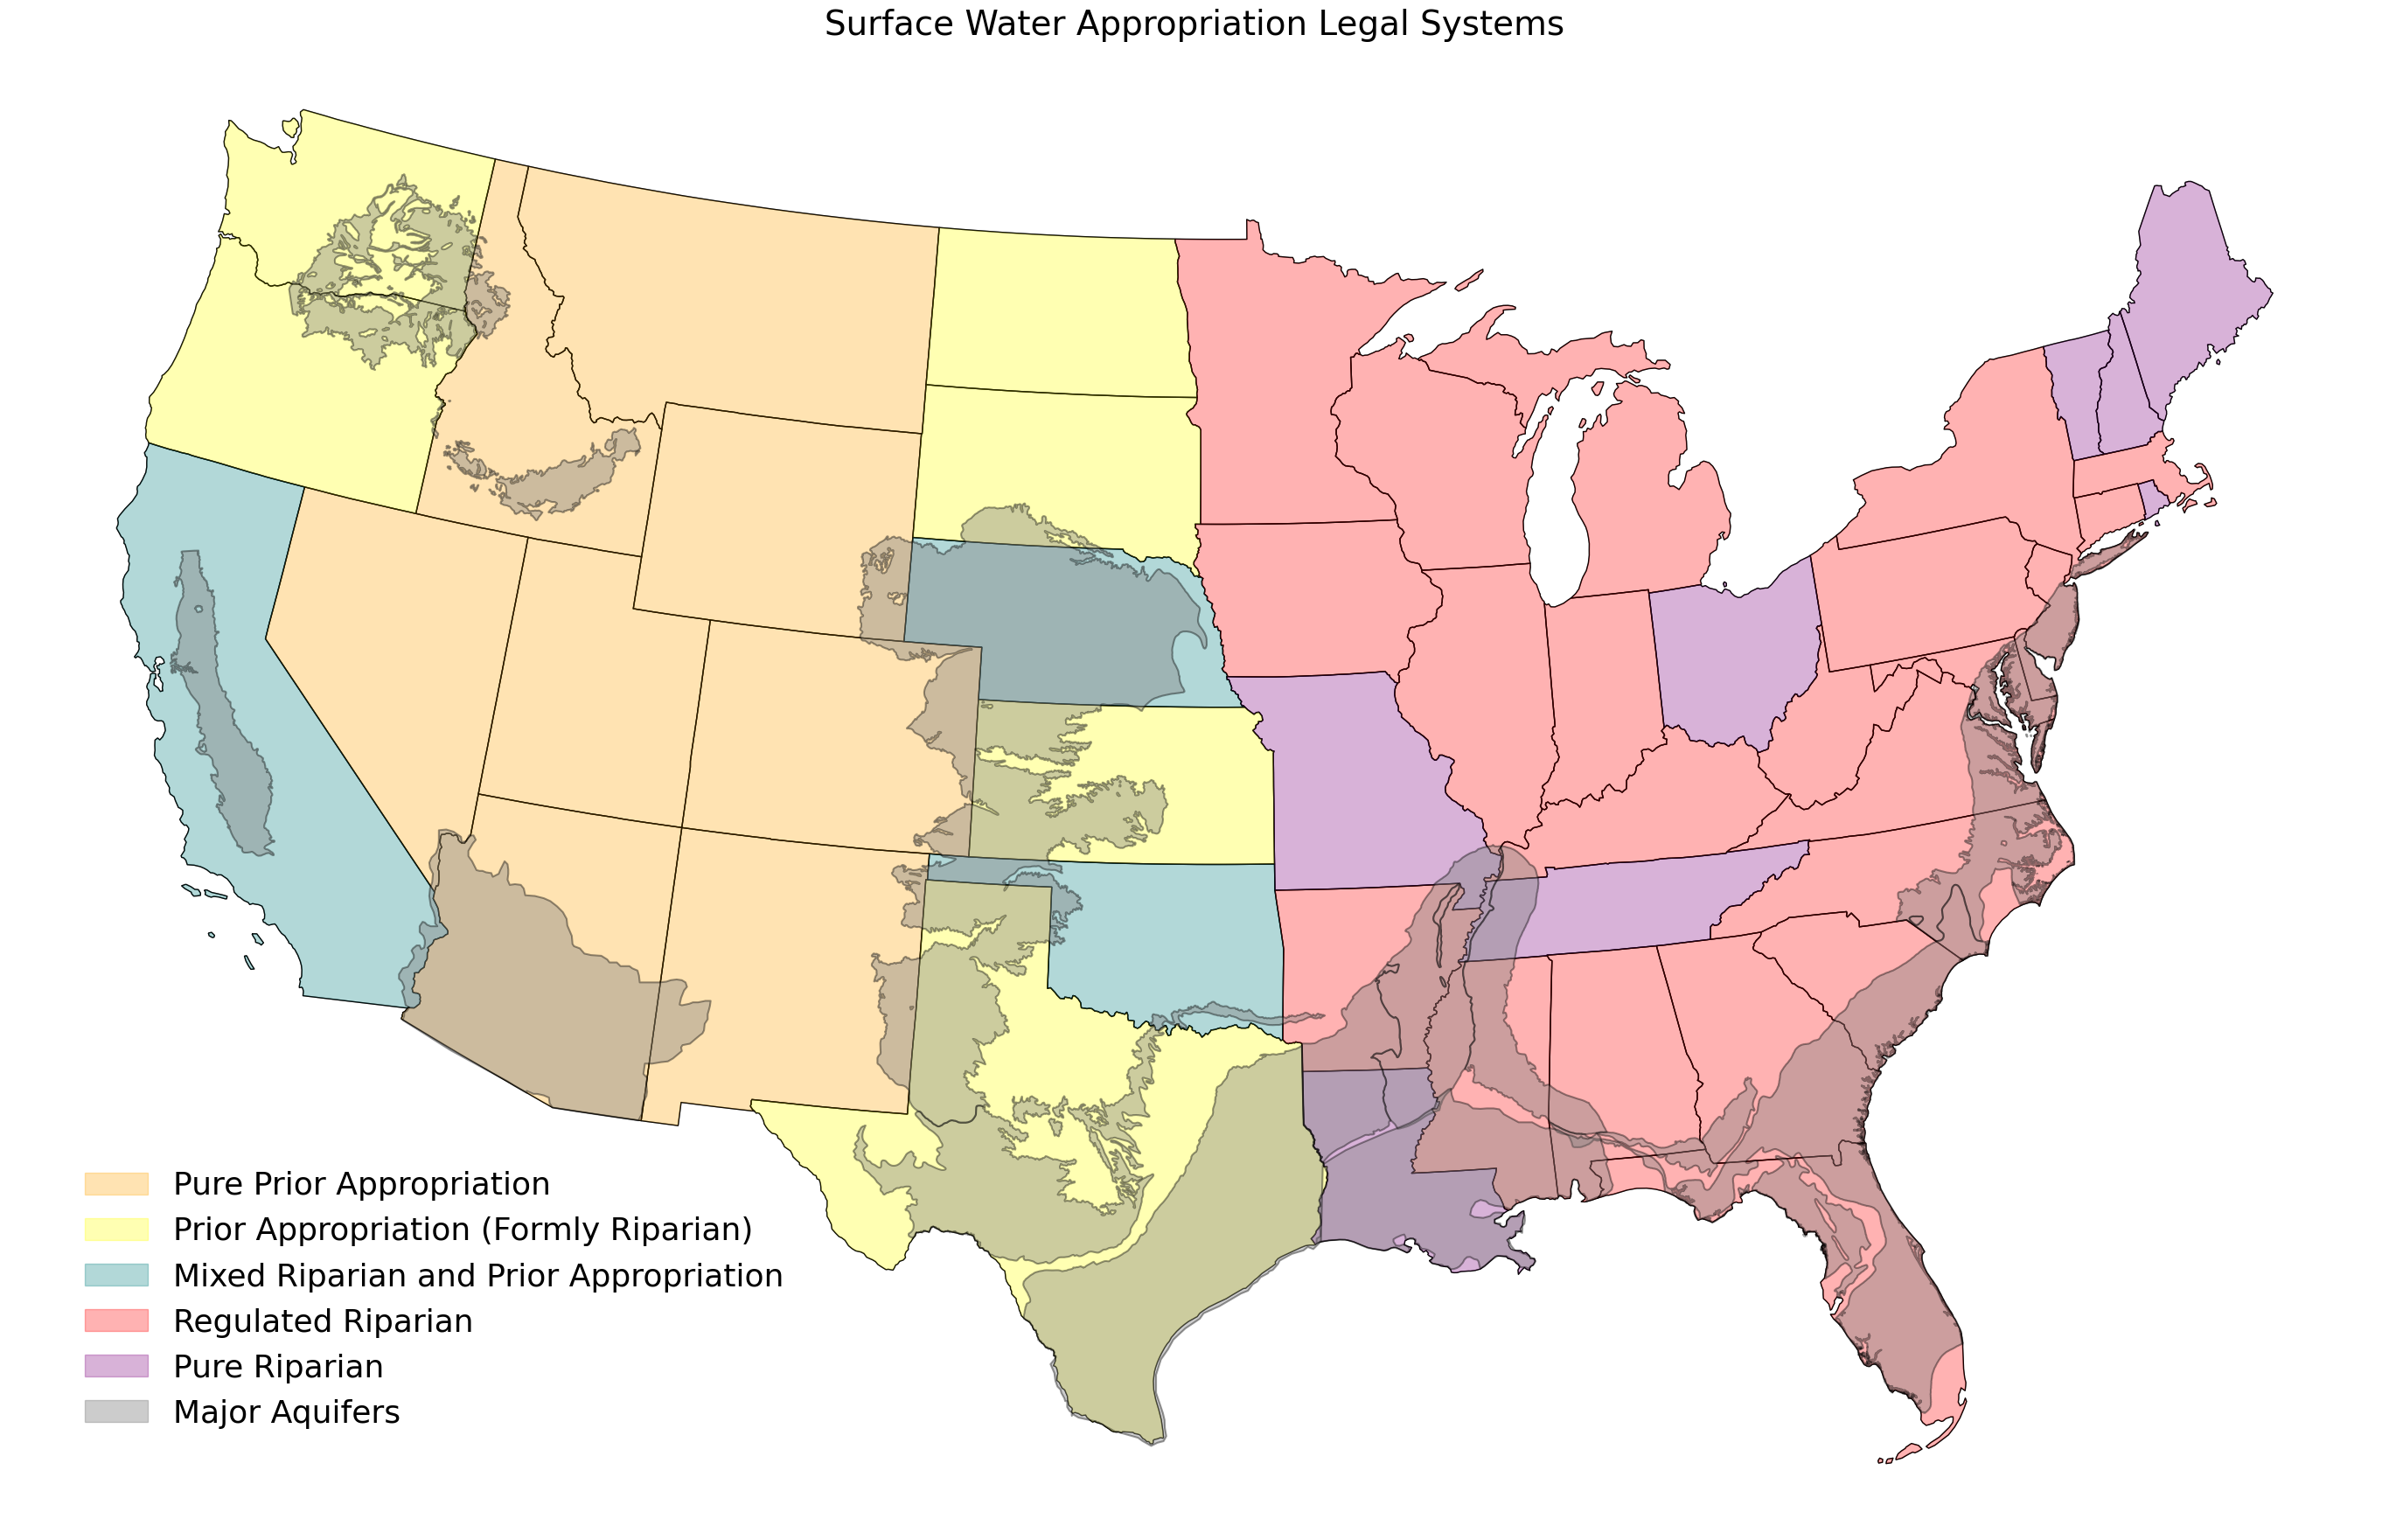

In [10]:
fig, ax = plt.subplots(figsize=(35, 35))
plt.title('Surface Water Appropriation Legal Systems', fontsize=28)

lower48 = lower48.to_crs('ESRI:102003')
lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0)  
#print(lower48.crs)

lower48_wr = lower48_wr.set_geometry('geometry')
lower48_wr = lower48_wr.to_crs('ESRI:102003')
#print(lower48_wr.crs)
#lower48_wr.plot(facecolor='orange', edgecolor='black', linewidth=1.0, alpha=0.3)
#select = lower48_wr[lower48_wr['sw_right'] == 'app'].reset_index()
lower48_wr[lower48_wr['sw_right'] == 'app'].plot(ax=ax, facecolor='orange', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['sw_right'] == 'app_new'].plot(ax=ax, facecolor='yellow', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['sw_right'] == 'mixed'].plot(ax=ax, facecolor='teal', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['sw_right'] == 'reg_rip'].plot(ax=ax, facecolor='red', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['sw_right'] == 'pure_rip'].plot(ax=ax, facecolor='purple', edgecolor='black', linewidth=1.0, alpha=0.3)
#lower48_wr[lower48_wr['STUSPS'] == 'NH'].plot(ax=ax, facecolor='purple', edgecolor='black', linewidth=1.0, alpha=0.3)
#lower48_wr[lower48_wr['STUSPS'] == 'AL'].plot(ax=ax, facecolor='blue', edgecolor='black', linewidth=1.0, alpha=0.3)

# aq_usgs_selected_7 = aq_usgs_selected_7.to_crs('ESRI:102003')
# aq_usgs_selected_7.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# aq_usgs_selected_10 = aq_usgs_selected_10.to_crs('ESRI:102003')
# aq_usgs_selected_10.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# aq_usgs_selected_25 = aq_usgs_selected_25.to_crs('ESRI:102003')
# aq_usgs_selected_25.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

aq_usgs_selected_depl = aq_usgs_selected_depl.to_crs('ESRI:102003')
aq_usgs_selected_depl.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='orange', alpha=0.3), 
                Patch(color='yellow', alpha=0.3),
                Patch(color='teal', alpha=0.3),
                Patch(color='red', alpha=0.3),
                Patch(color='purple', alpha=0.3),
                Patch(color='grey', alpha=0.4)])  # Add the handle for legend
labels.extend(['Pure Prior Appropriation', 'Prior Appropriation (Formly Riparian)', 'Mixed Riparian and Prior Appropriation',
                'Regulated Riparian', 'Pure Riparian', 'Major Aquifers'])  # Add the label for legend
#legend = ax.get_legend()
legend = ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.02, 0.05), fontsize=26)
frame = legend.get_frame()  # Get the legend frame
frame.set_linewidth(0)

ax.axis("off")

img_path = f'Saved_Visuals/legal/legal_sw_rights_map_aq_depl.png'
fn.save_plot_as_image(img_path, overwrite)

plt.show()

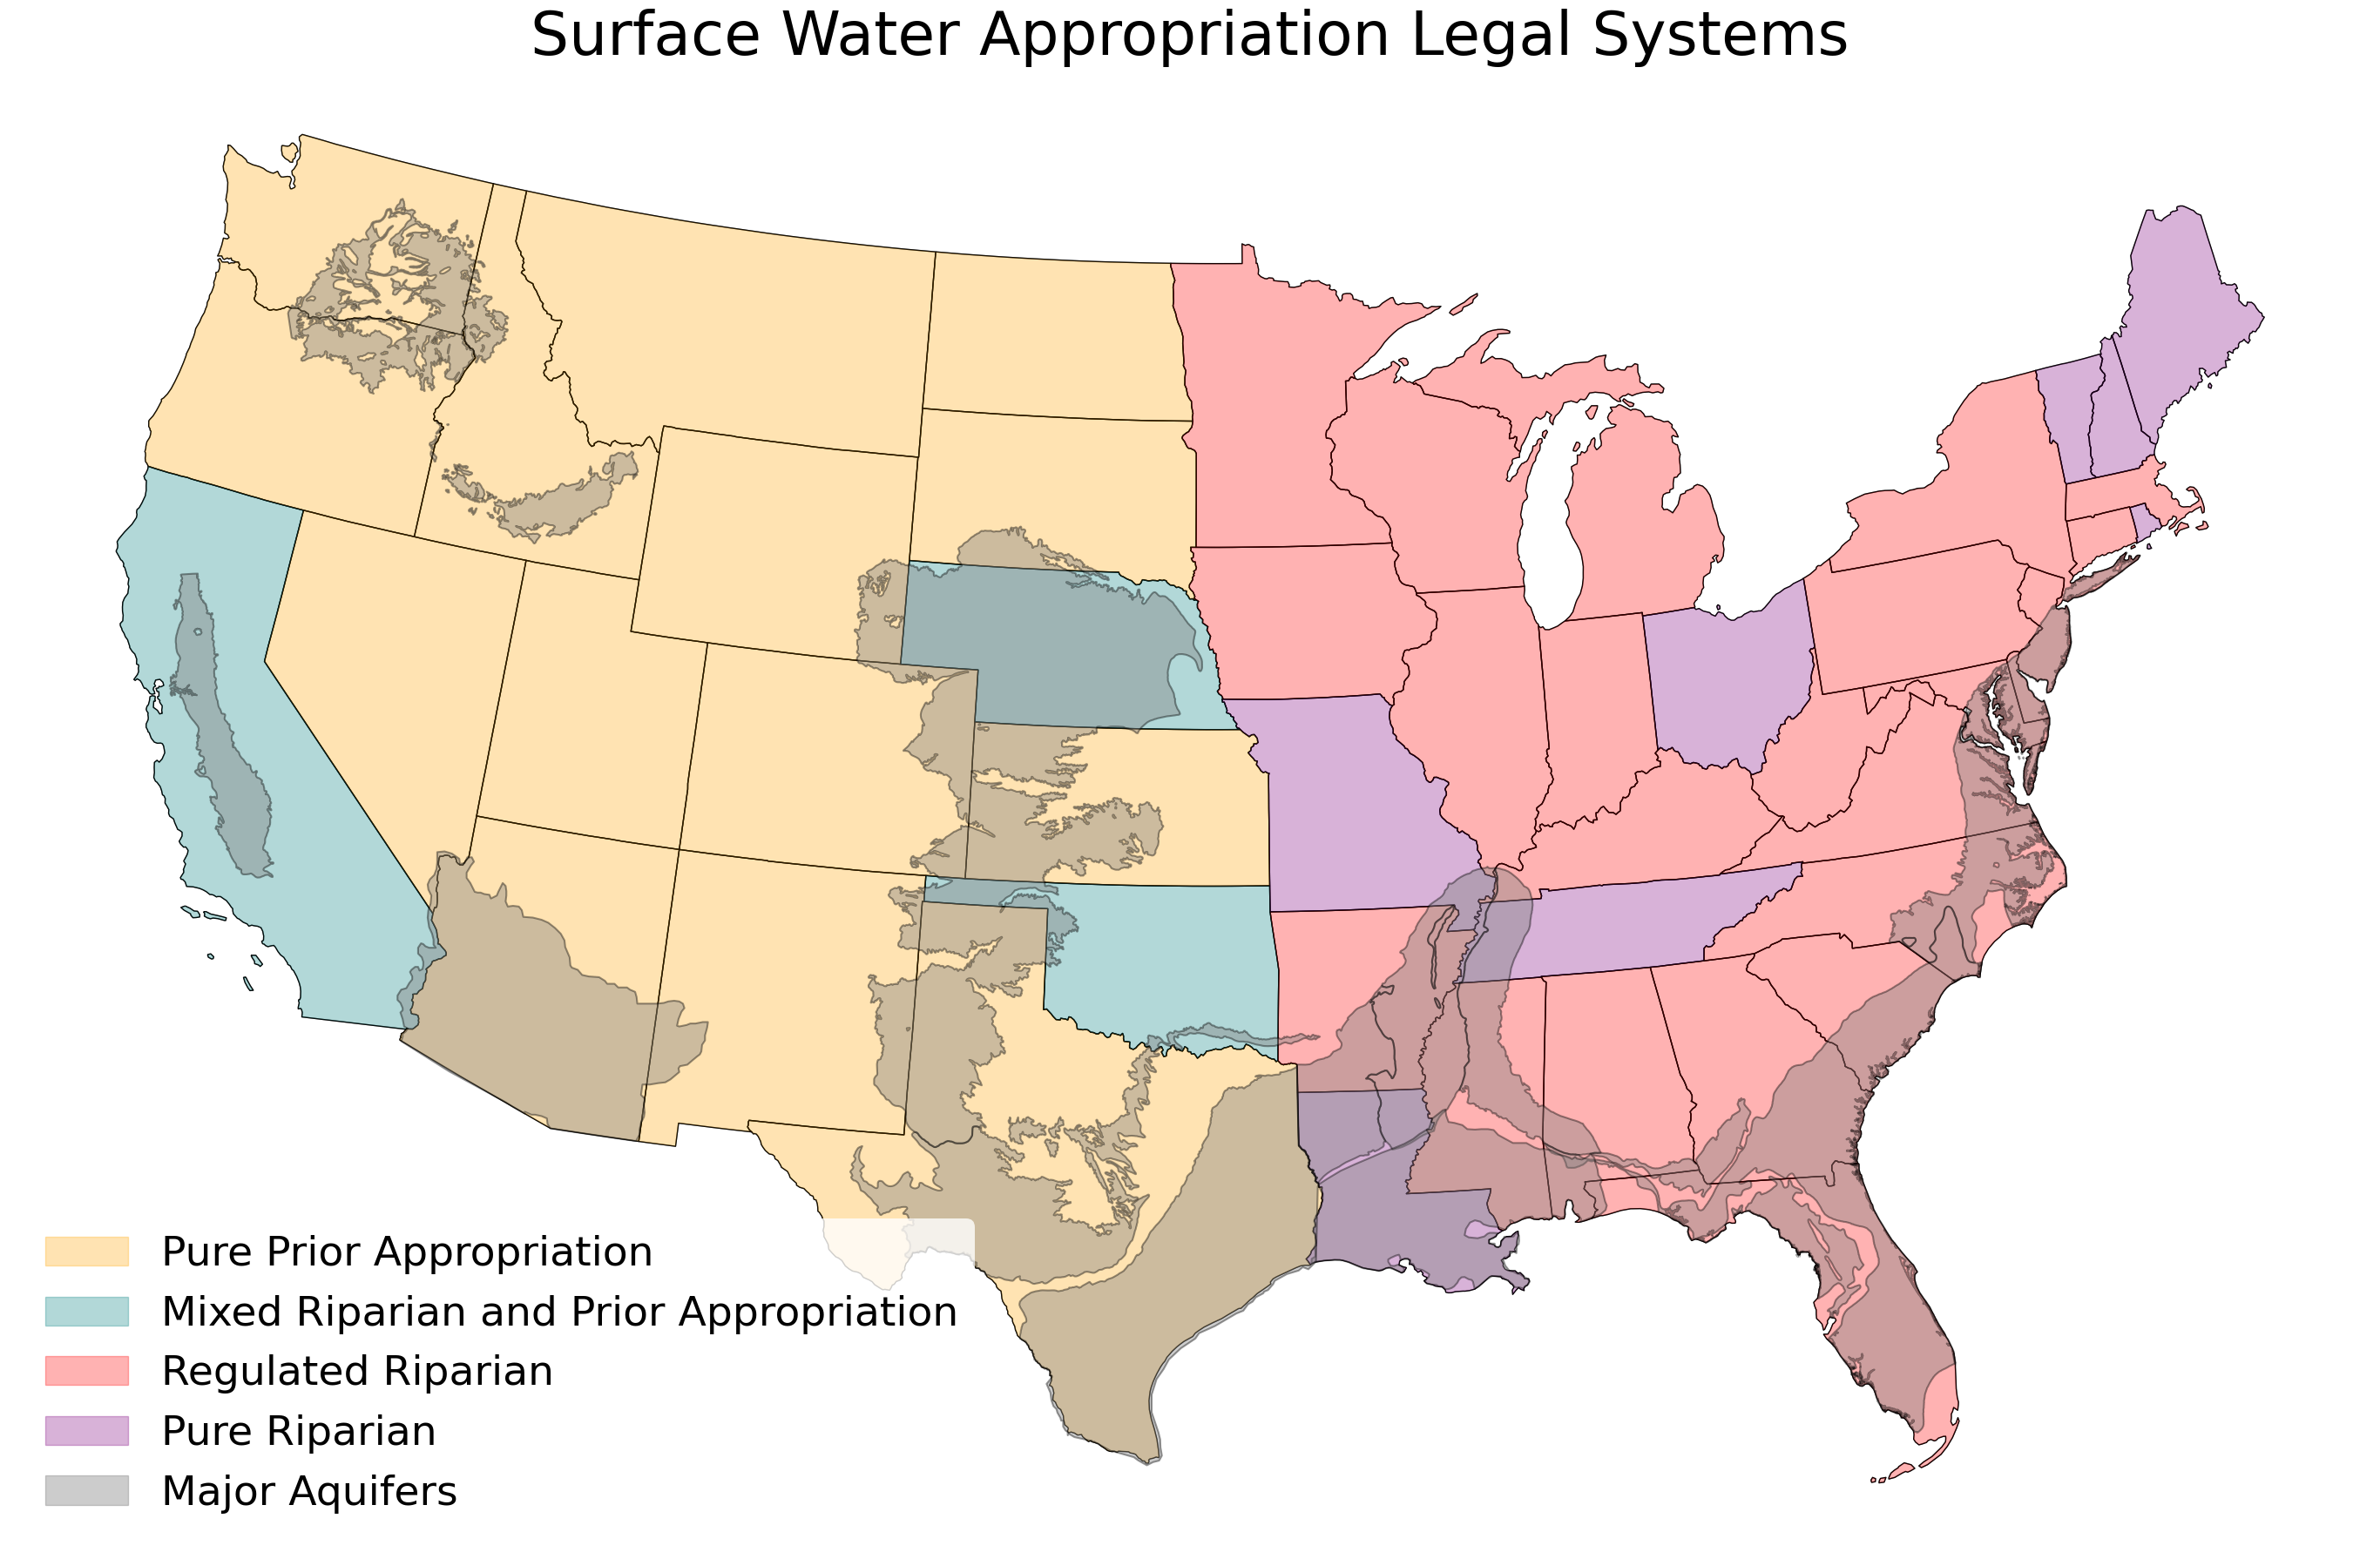

In [25]:
fig, ax = plt.subplots(figsize=(35, 35))
plt.title('Surface Water Appropriation Legal Systems', fontsize=50)

lower48 = lower48.to_crs('ESRI:102003')
lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0)  
#print(lower48.crs)

lower48_wr = lower48_wr.set_geometry('geometry')
lower48_wr = lower48_wr.to_crs('ESRI:102003')
#print(lower48_wr.crs)
#lower48_wr.plot(facecolor='orange', edgecolor='black', linewidth=1.0, alpha=0.3)
#select = lower48_wr[lower48_wr['sw_right'] == 'app'].reset_index()
lower48_wr[lower48_wr['sw_right_2'] == 'app'].plot(ax=ax, facecolor='orange', edgecolor='black', linewidth=1.0, alpha=0.3)
#lower48_wr[lower48_wr['sw_right_2'] == 'app_new'].plot(ax=ax, facecolor='yellow', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['sw_right_2'] == 'mixed'].plot(ax=ax, facecolor='teal', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['sw_right_2'] == 'reg_rip'].plot(ax=ax, facecolor='red', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['sw_right_2'] == 'pure_rip'].plot(ax=ax, facecolor='purple', edgecolor='black', linewidth=1.0, alpha=0.3)
#lower48_wr[lower48_wr['STUSPS'] == 'NH'].plot(ax=ax, facecolor='purple', edgecolor='black', linewidth=1.0, alpha=0.3)
#lower48_wr[lower48_wr['STUSPS'] == 'AL'].plot(ax=ax, facecolor='blue', edgecolor='black', linewidth=1.0, alpha=0.3)

# aq_usgs_selected_7 = aq_usgs_selected_7.to_crs('ESRI:102003')
# aq_usgs_selected_7.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# aq_usgs_selected_10 = aq_usgs_selected_10.to_crs('ESRI:102003')
# aq_usgs_selected_10.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# aq_usgs_selected_25 = aq_usgs_selected_25.to_crs('ESRI:102003')
# aq_usgs_selected_25.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

aq_usgs_selected_depl = aq_usgs_selected_depl.to_crs('ESRI:102003')
aq_usgs_selected_depl.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='orange', alpha=0.3), 
                Patch(color='teal', alpha=0.3),
                Patch(color='red', alpha=0.3),
                Patch(color='purple', alpha=0.3),
                Patch(color='grey', alpha=0.4)])  # Add the handle for legend
labels.extend(['Pure Prior Appropriation', 'Mixed Riparian and Prior Appropriation',
                'Regulated Riparian', 'Pure Riparian', 'Major Aquifers'])  # Add the label for legend
#legend = ax.get_legend()
legend = ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.0, 0.0), fontsize=34)
frame = legend.get_frame()  # Get the legend frame
frame.set_linewidth(0)

ax.axis("off")

img_path = f'Saved_Visuals/legal/legal_sw_rights_map_aq_depl.png'
plt.savefig(img_path, bbox_inches='tight', transparent=True)

plt.show()

In [17]:
lower48_wr['mar_asr_projects'].unique()

array(['ASR_reclaimed', 'na', 'MAR_ASR_flood', 'MAR_ASR_flood_permit',
       'MAR_ASR_reclaimed'], dtype=object)

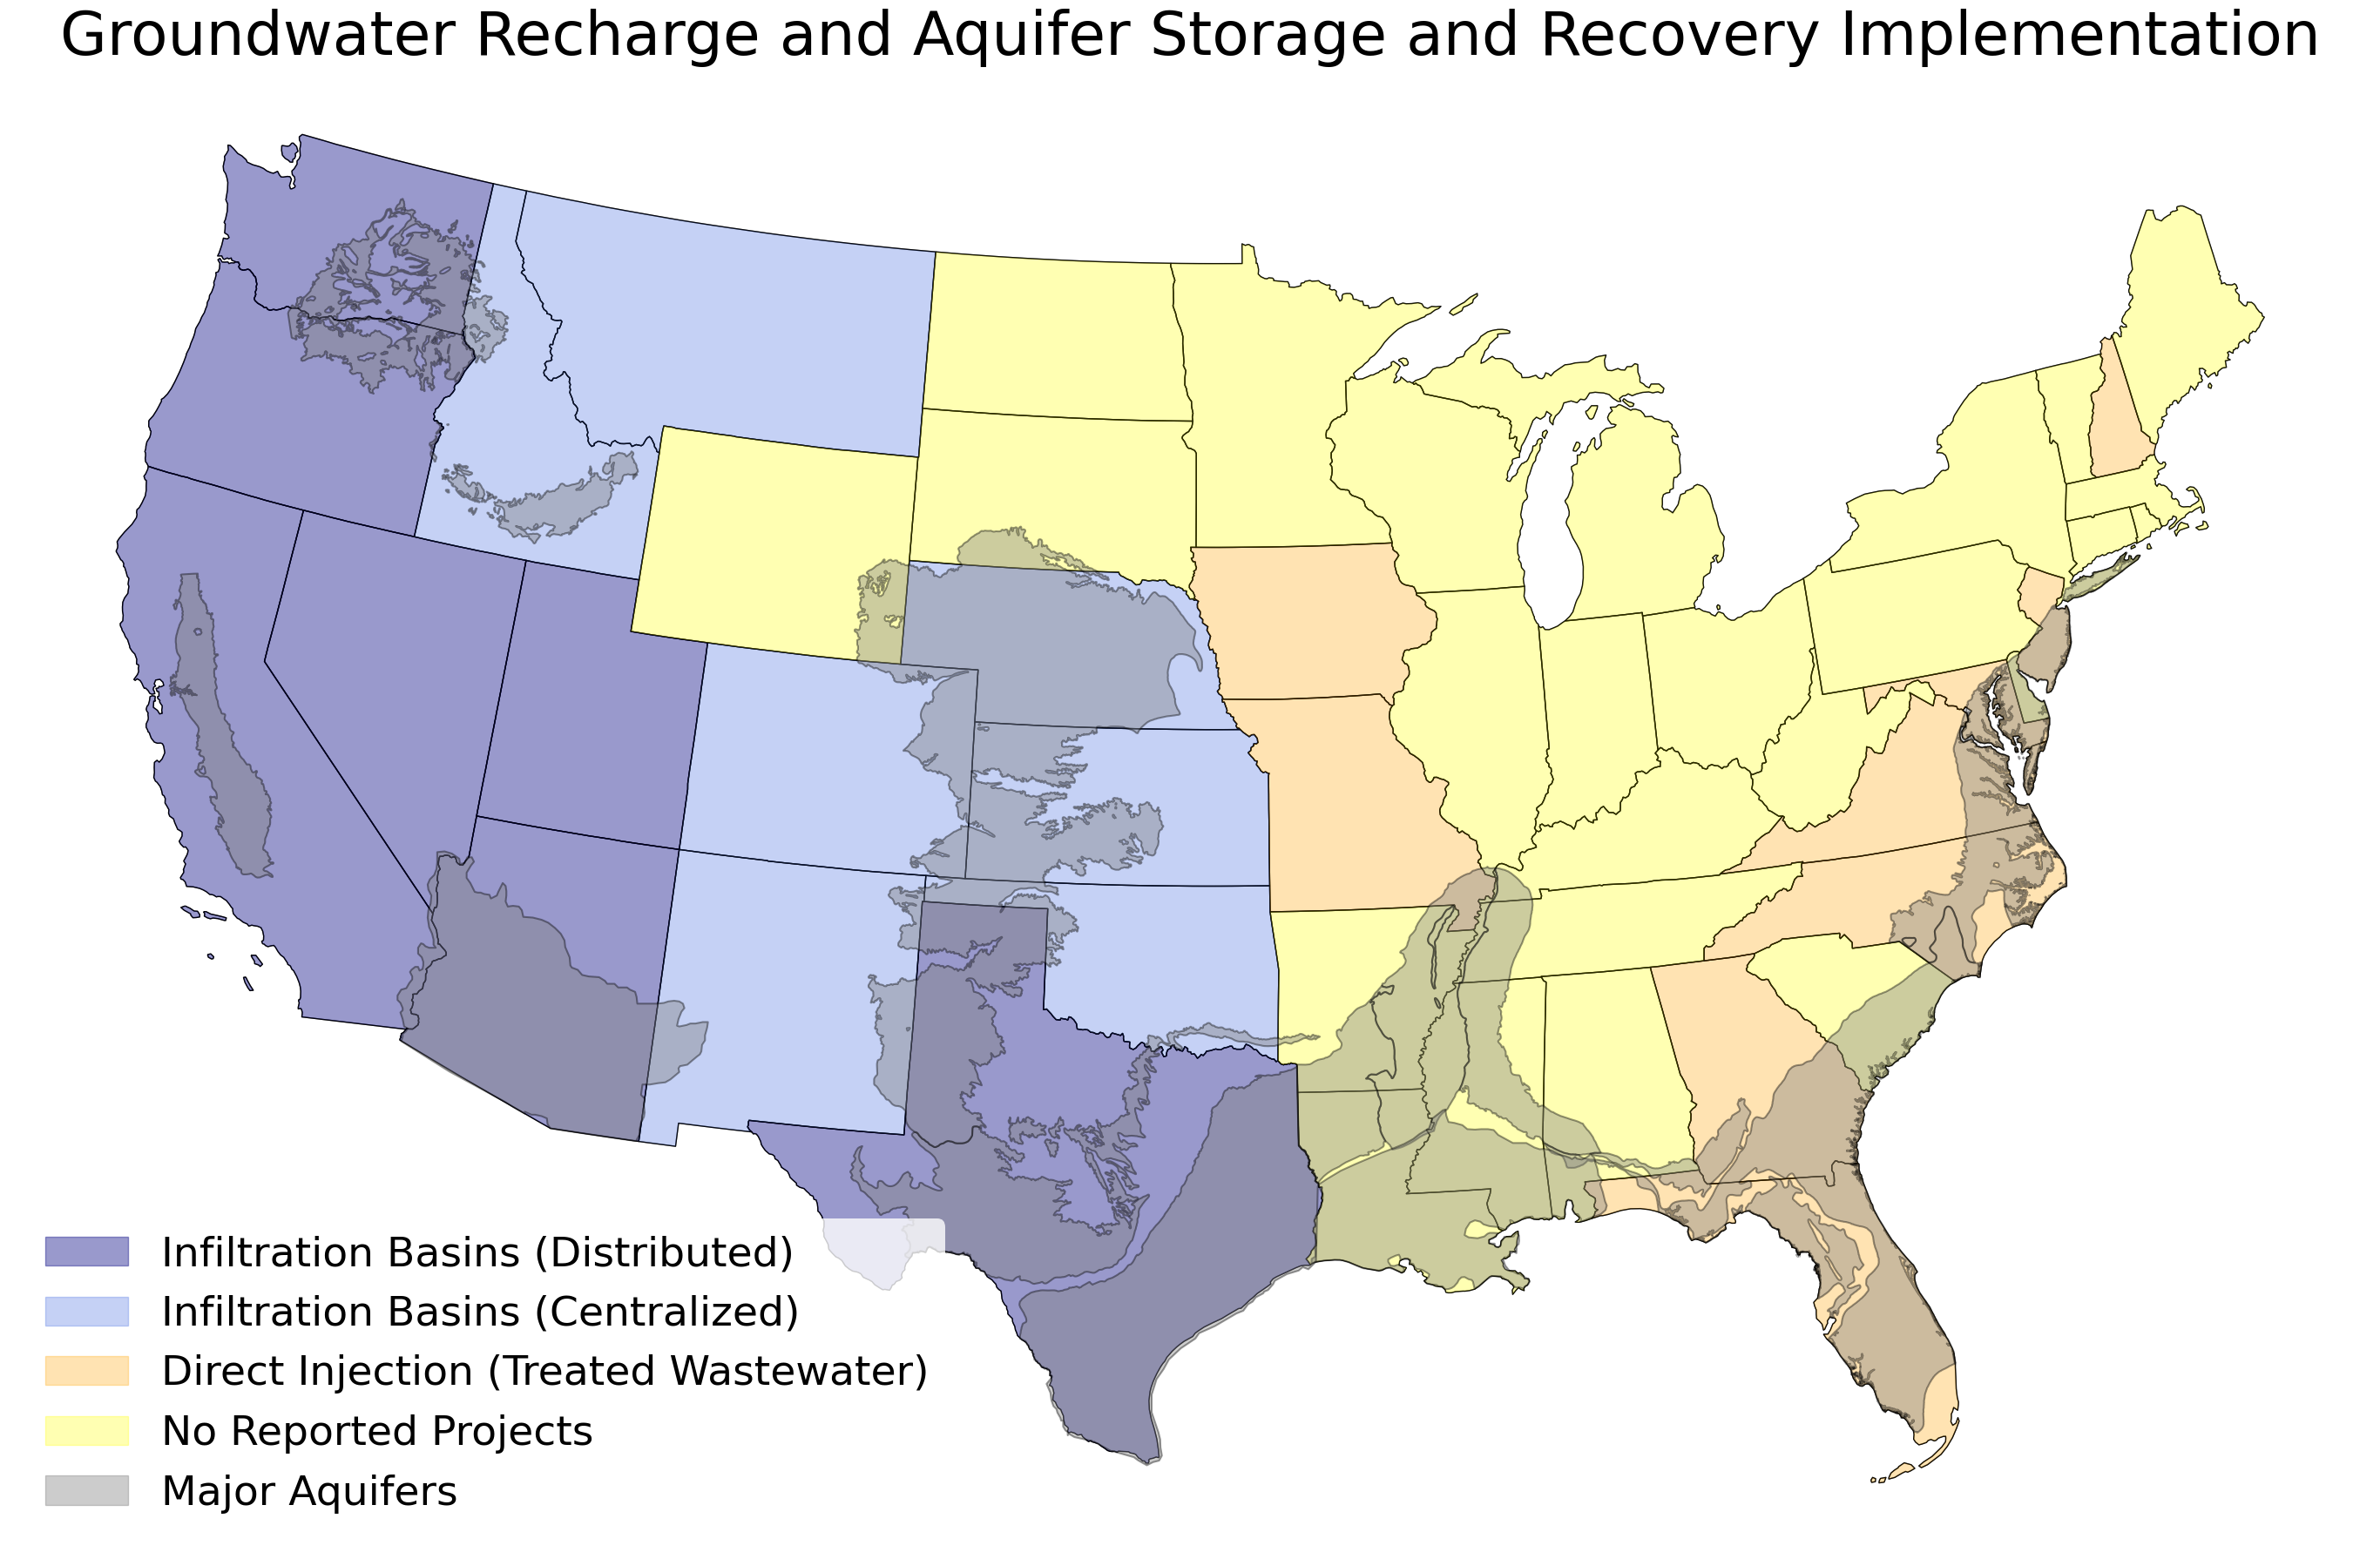

In [31]:
fig, ax = plt.subplots(figsize=(35, 40))
plt.title('Groundwater Recharge and Aquifer Storage and Recovery Implementation', fontsize=50)

lower48 = lower48.to_crs('ESRI:102003')
lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

lower48_wr = lower48_wr.set_geometry('geometry')
lower48_wr = lower48_wr.to_crs('ESRI:102003')
lower48_wr[lower48_wr['mar_asr_projects'] == 'MAR_ASR_flood_permit'].plot(ax=ax, facecolor='navy', edgecolor='black', linewidth=1.0, alpha=0.4)
lower48_wr[lower48_wr['mar_asr_projects'] == 'MAR_ASR_flood'].plot(ax=ax, facecolor='royalblue', edgecolor='black', linewidth=1.0, alpha=0.3)
#lower48_wr[lower48_wr['mar_asr_projects'] == 'MAR_ASR_reclaimed'].plot(ax=ax, facecolor='red', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['mar_asr_projects'] == 'ASR_reclaimed'].plot(ax=ax, facecolor='orange', edgecolor='black', linewidth=1.0, alpha=0.3)
lower48_wr[lower48_wr['mar_asr_projects'] == 'na'].plot(ax=ax, facecolor='yellow', edgecolor='black', linewidth=1.0, alpha=0.3)

# aq_usgs_selected_7 = aq_usgs_selected_7.to_crs('ESRI:102003')
# aq_usgs_selected_7.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# aq_usgs_selected_10 = aq_usgs_selected_10.to_crs('ESRI:102003')
# aq_usgs_selected_10.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# aq_usgs_selected_25 = aq_usgs_selected_25.to_crs('ESRI:102003')
# aq_usgs_selected_25.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

aq_usgs_selected_depl = aq_usgs_selected_depl.to_crs('ESRI:102003')
aq_usgs_selected_depl.plot(ax=ax, edgecolor='black', facecolor='grey', linewidth=1.5, alpha=0.4)

# Plot legend
handles = []  # Store handles for legend
labels = []   # Store labels for legend
handles.extend([Patch(color='navy', alpha=0.4), 
                Patch(color='royalblue', alpha=0.3),
                #Patch(color='red', alpha=0.3),
                Patch(color='orange', alpha=0.3),
                Patch(color='yellow', alpha=0.3),
                Patch(color='grey', alpha=0.4)])  # Add the handle for legend
labels.extend(['Infiltration Basins (Distributed)', 'Infiltration Basins (Centralized)', 
               'Direct Injection (Treated Wastewater)', 'No Reported Projects', 'Major Aquifers'])  # Add the label for legend
legend = ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.0, 0.0), fontsize=34)
frame = legend.get_frame()  # Get the legend frame
frame.set_linewidth(0)

ax.axis("off")

img_path = f'Saved_Visuals/legal/recharge_implementation_map_aq_depl.png'
plt.savefig(img_path, bbox_inches='tight', transparent=True)

plt.show()